In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/cleaned_reviews.tsv", sep="\t")
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary
0,4,2,True,"04 6, 2017",Amazon Customer,helpful,Four Stars
1,5,0,True,"03 14, 2017",Amazon Customer,easy understand prompt service,Five Stars
2,4,0,True,"02 14, 2017",Christopher Burnett,girlfriend use quite often,Four Stars
3,5,0,True,"01 29, 2017",Amazon Customer,arrive described happy,Very happy.
4,5,0,True,"01 4, 2017",Iheartmanatees,love dummy series never fails,Love the Dummies Series
...,...,...,...,...,...,...,...
21654,5,0,True,"02 24, 2014",Nadia,like marie claire much anymore content nice ha...,Marie Claire
21655,5,0,True,"02 13, 2014",Deborah N.,ive reading mc several year ereader ive age ey...,LOVE THIS MAGAZINE!
21656,1,2,True,"02 12, 2014",Coco,cancel subscription diversity cover girl color...,Diversity??
21657,3,2,True,"02 4, 2014",Doris M. Goodhues,nothing ad go magazine 5 minute sad guess that...,Too many ads


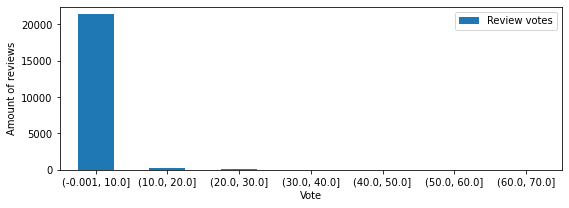

In [3]:
bins = list(range(0, 50 + 25, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

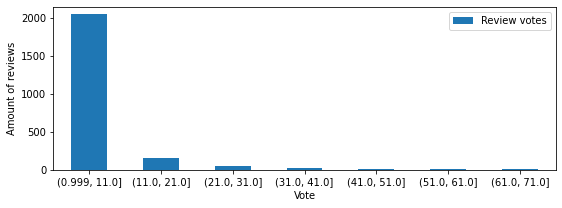

In [4]:
bins = list(range(1, 50 + 25, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

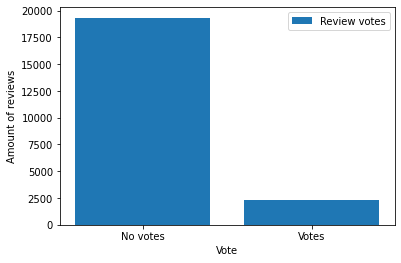

In [5]:
votes = df["vote"].value_counts()
no_votes = votes[0].sum()
has_votes = votes[1:].sum()
plt.bar(["No votes", "Votes"], [no_votes, has_votes])
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

In [6]:
bins = list(range(1, 50 + 25, 10))  # [1, 11, 21, 31, 41, 51, 61, 71]


def split_by_ratings(data: pd.DataFrame) -> list[list]:
    split_data = []
    for rating in range(5, 0, -1):
        single_rating_votes = df.loc[df.rating == rating]["vote"]
        binned = single_rating_votes.value_counts(bins=bins)
        split_data.append(binned.to_list())
    return split_data


split_by_ratings(df)

[[952, 49, 14, 8, 4, 3, 2],
 [264, 20, 8, 4, 2, 1, 1],
 [203, 12, 3, 2, 0, 0, 0],
 [165, 17, 3, 3, 1, 0, 0],
 [459, 55, 20, 6, 5, 3, 1]]

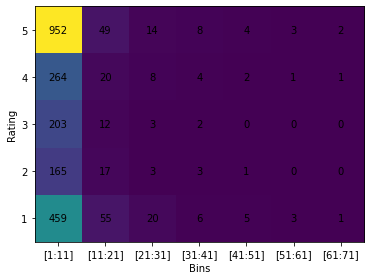

In [7]:
heatmap = np.array(split_by_ratings(df))

bin_labels = [
    "[1:11]",
    "[11:21]",
    "[21:31]",
    "[31:41]",
    "[41:51]",
    "[51:61]",
    "[61:71]",
]
rating_labels = range(5, 0, -1)

fig, ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_yticks(range(len(rating_labels)), lables="rating")
ax.set_xticks(range(len(bin_labels)), lables="bins")
ax.set_ylabel("Rating")
ax.set_xlabel("Bins")
ax.set_xticklabels(bin_labels)
ax.set_yticklabels(rating_labels)

for i in range(5):
    for j in range(len(bins) - 1):
        text = ax.text(j, i, heatmap[i, j], ha="center", va="center")

fig.tight_layout()
plt.show()